In [2]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
data = pd.read_json('dataset/label_data.json', lines=True)
data.info()
data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2858 entries, 0 to 2857
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lanes      2858 non-null   object
 1   h_samples  2858 non-null   object
 2   raw_file   2858 non-null   object
dtypes: object(3)
memory usage: 67.1+ KB


,lanes,h_samples,raw_file
0,"[[-100, -100, -100, -100, 632, 625, 617, 609, ...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-1/6040/20.jpg
1,"[[-100, -100, -100, 658, 646, 635, 623, 612, 6...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-1/5320/20.jpg
2,"[[-100, 570, 554, 538, 522, 505, 489, 473, 456...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-1/23700/20.jpg
3,"[[-100, -100, -100, -100, 555, 542, 530, 517, ...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-1/51660/20.jpg
4,"[[-100, -100, -100, 522, 525, 528, 531, 534, 5...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-1/25680/20.jpg
...,...,...,...
2853,"[[-100, -100, -100, 595, 589, 583, 577, 571, 5...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-2/26520/20.jpg
2854,"[[-100, -100, 728, 683, 651, 624, 608, 592, 57...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-2/30960/20.jpg
2855,"[[417, 435, 453, 471, 477, 478, 480, 481, 482,...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-2/23220/20.jpg
2856,"[[-100, -100, -100, -100, 440, 451, 458, 458, ...","[240, 250, 260, 270, 280, 290, 300, 310, 320, ...",clips/0313-2/35300/20.jpg


In [4]:
def imshow(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [5]:
def get_lane_mask(sample,lane_idx):
    points_lane = []
    h_max = np.max(data['h_samples'][sample])
    h_min = np.min(data['h_samples'][sample])
    x_idx = data['lanes'][sample][lane_idx]
    y_idx = data['h_samples'][sample]
    for x,y in zip(x_idx,y_idx):
        offset = (y-h_min)/20
    #     print(offset)
        if x>-100:
            points_lane.append([x-offset/2,y])
    x_idx_=x_idx.copy()
    y_idx_=y_idx.copy()
    x_idx_.reverse()
    y_idx_.reverse()
    for x,y in zip(x_idx_,y_idx_):
        offset = (y-h_min)/20
    #     print(offset)
        if x>-100:
            points_lane.append([x+offset/2,y])
    return points_lane
# get_lane_mask(0,0)

In [6]:

def create_lane_mask(img_raw,sample):
    laneMask = np.zeros(img_raw.shape, dtype=np.uint8)
    for lane_idx in range(len(data.lanes[sample])):
        points_lane = get_lane_mask(sample,lane_idx)
        pts = np.array(points_lane, np.int32)
        pts = pts.reshape((-1,1,2))
        laneMask = cv2.fillPoly(laneMask,[pts],(255,255,255))
    return(img_raw, laneMask)
#     imshow(laneMask)

clips/0313-1/10100/20.jpg
dataset/masks/20.jpg


True

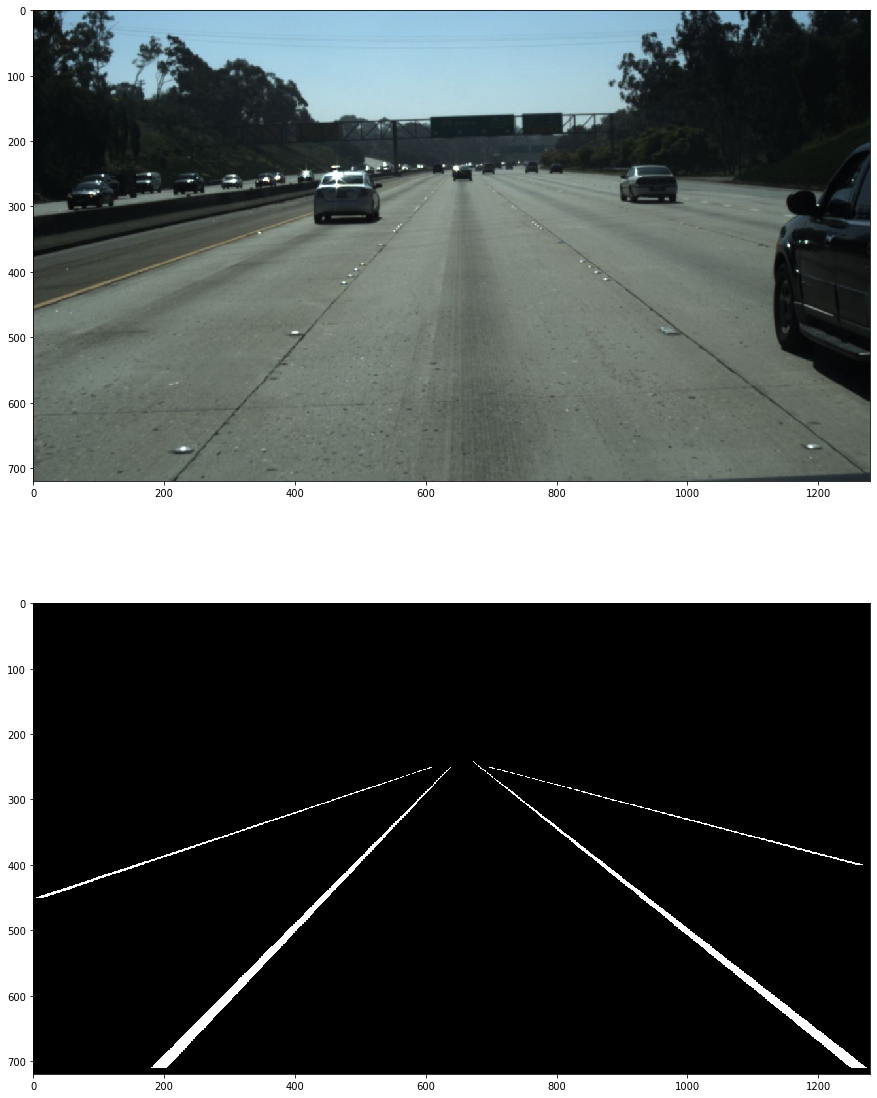

In [7]:
sample = 8
img_path = data.raw_file[sample]
print(img_path)
img_raw = cv2.imread('dataset/'+img_path)
img_, mask = create_lane_mask(img_raw,sample)
fig = plt.figure(figsize=(15,20))
plt.subplot(211)
imshow(img_)
plt.subplot(212)
imshow(mask)
file_name = img_path.split('/')[-1]
save_path = 'dataset/masks/'+file_name
print(save_path)
cv2.imwrite(save_path, mask)

In [8]:
i= 8

In [1]:
img_path = data.raw_file[i]
print(img_path)
img_raw = cv2.imread('dataset/'+img_path)
file_name = img_path.split('/')
file_name.pop(-1)
file_path = os.path.join(*file_name)
file_path = 'dataset/'+file_path+'/mask.jpg'
print(file_path)
img_, mask = create_lane_mask(img_raw,i)
cv2.imwrite(file_path,mask)
i+=1

NameError: name 'data' is not defined

In [32]:
file_name = img_path.split('/')
file_name.pop(-1)

'20.jpg'

In [33]:
file_path = os.path.join(*file_name)
print(file_path)

clips/0313-1/6180
